# ATX-DAT-2 | Codealong and Lab 13

# Codealong - Text Processing with scikit-learn

In [58]:
import os
import math
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import feature_extraction, ensemble, cross_validation, metrics

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

plt.style.use('ggplot')

The data is about sentiments on Amazon reviews.

In [59]:
reviews = []
sentiments = []

with open(os.path.join('..', 'datasets', 'amazon-reviews.txt')) as f:
    for line in f.readlines():
        line = line.strip('\n')
        review, sentiment = line.split('\t')
        sentiment = np.nan if sentiment == '' else int(sentiment)

        reviews.append(review)
        sentiments.append(sentiment)

df = pd.DataFrame({'review': reviews, 'sentiment': sentiments})

In [60]:
df

,review,sentiment
0,I try not to adjust the volume setting to avoi...,NaN
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
3,I thought Motorola made reliable products!.,NaN
4,Battery for Motorola Razr.,NaN
...,...,...
14999,"The screen on my phone said ""Not Charging"".",NaN
15000,This is my 4th Samsung cell phone with T-Mobile.,NaN
15001,great company.,NaN
15002,"The ""call"" and ""hang-up"" keys are now properly...",NaN


In [61]:
df.dropna(inplace = True) # Let's drop the NaN

In [62]:
df.head()

,review,sentiment
1,So there is no way for me to plug it in here i...,0.0
2,"Good case, Excellent value.",1.0
5,Great for the jawbone.,1.0
10,Tied to charger for conversations lasting more...,0.0
11,The mic is great.,1.0


In [8]:
X = df.review
y = df.sentiment

## Train/test sets

In [16]:
train_X, test_X, train_y, test_y = cross_validation.train_test_split(X, y, test_size = 0.4)

In [17]:
train_X

2290                                  Doesn't do the job.
851                                    It's a great item.
1197    Not a good item.. It worked for a while then s...
680                                     WORST PHONE EVER.
1012    As many people complained, I found this headse...
                              ...                        
1621    I ended up sliding it on the edge of my pants ...
1925    Plus, I seriously do not believe it is worth i...
2457     Terrible.. My car will not accept this cassette.
1477    The volume switch rocketed out of the unit to ...
2637    So I bought about 10 of these and saved alot o...
Name: review, dtype: object

## `CountVectorizer`

`CountVectorizer` converts a collection of text into a matrix of features.  Each row will be a sample (an article or piece of text) and each column will be a text feature (usually a count or binary feature per word).

`CountVectorizer` takes a column of text and creates a new dataset.  It generates a feature for every word in all of the pieces of text.

CAUTION: Using all of the words can be useful, but we may need to use regularization to avoid overfitting.  Otherwise, rare words may cause the model to overfit and not generalize.

(And check http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html as needed)

In [82]:
# Instantiate a new CountVectorizer

# Stopwords are non-content words.  (e.g. 'to', 'the', and 'it'
# They aren’t helpful for prediction, so we remove them.

vectorizer = feature_extraction.text.CountVectorizer(stop_words = 'english', ngram_range=(1, 3))

In [83]:
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Vectorizers are like other models in scikit-learn:
- We create a vectorizer object with the parameters of our feature space
- We fit a vectorizer to learn the vocabulary
- We transform a set of text into that feature space

Note: there is a distinction between fit and transform:
- We fit from our training set.  This is part of the model building process, so we don't look at our test set
- We transform our test set using our model fit on the training set

In [84]:
# We use `fit` to learn the vocabulary of the reviews

vectorizer.fit(train_X)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [85]:
# The bag-of-words

len(vectorizer.get_feature_names())

4813

In [86]:
# We use `tranform` to generate the sample X word matrix - one column per feature (here, a word)

train_X_transformed = vectorizer.transform(train_X)
test_X_transformed = vectorizer.transform(test_X)

In [87]:
print train_X_transformed

  (0, 1190)	1
  (0, 1195)	1
  (0, 2169)	1
  (1, 1778)	1
  (1, 1799)	1
  (1, 2130)	1
  (2, 219)	1
  (2, 220)	1
  (2, 221)	1
  (2, 1700)	1
  (2, 1717)	1
  (2, 1718)	1
  (2, 1896)	1
  (2, 1898)	1
  (2, 1899)	1
  (2, 2130)	1
  (2, 2141)	1
  (2, 2143)	1
  (2, 3171)	1
  (2, 3300)	1
  (2, 3301)	1
  (2, 3302)	1
  (2, 3649)	1
  (2, 3650)	1
  (2, 3651)	1
  :	:
  (598, 3689)	1
  (598, 3690)	1
  (598, 3691)	1
  (598, 4166)	1
  (598, 4167)	1
  (598, 4168)	1
  (598, 4384)	1
  (598, 4387)	1
  (598, 4388)	1
  (598, 4391)	1
  (598, 4547)	1
  (598, 4557)	1
  (598, 4558)	1
  (599, 0)	1
  (599, 3)	1
  (599, 4)	1
  (599, 134)	1
  (599, 135)	1
  (599, 459)	1
  (599, 460)	1
  (599, 461)	1
  (599, 2610)	1
  (599, 3729)	1
  (599, 3730)	1
  (599, 3731)	1


While dense matrices store every entry in the matrix, sparse matrices only store the nonzero entries.  Sparse matrices don't have a lot of extra features, and some algorithms may not work for them so you use them when you need to work with matrices that would be too big for the computer to handle them, but they are mostly zero, so they compress easily.  You can convert from sparse matrices to dense matrices with `.todense()`

In [88]:
train_X_transformed.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]])

## Random Forest

We can now build a random forest model to predict "sentiment".

In [89]:
model = ensemble.RandomForestClassifier(n_estimators = 5)

cross_validation.cross_val_score(model, train_X_transformed, train_y, scoring = 'roc_auc')

array([ 0.80163016,  0.81833183,  0.76517652])

In [90]:
model.fit(train_X_transformed, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
model.score(train_X_transformed, train_y)

0.95333333333333337

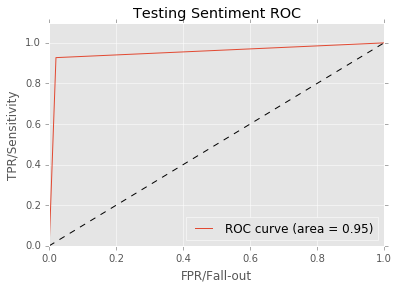

In [92]:
train_y_hat = model.predict(train_X_transformed)

fpr, tpr, thresholds = metrics.roc_curve(train_y, train_y_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title('Testing Sentiment ROC')
plt.legend(loc = 'lower right')
plt.show()

In [79]:
model.score(test_X_transformed, test_y)

0.76000000000000001

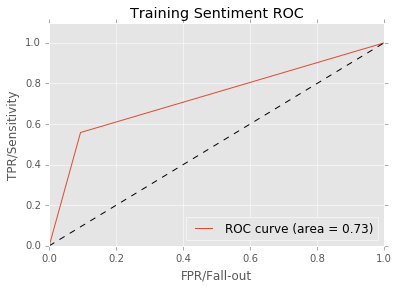

In [93]:
test_y_hat = model.predict(test_X_transformed)

fpr, tpr, thresholds = metrics.roc_curve(test_y, test_y_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([.0, 1.])
plt.ylim([.0, 1.1])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title('Training Sentiment ROC')
plt.legend(loc = 'lower right')
plt.show()

In [94]:
importance=pd.DataFrame({'words': vectorizer.get_feature_names(), 'importance': model.feature_importances_})
importance[importance.importance>0].sort_values(by = 'importance').tail(20)

,importance,words
1728,0.006235,good product
996,0.006525,crisp
4726,0.007436,working
4666,0.007586,winner
1972,0.007644,highly
...,...,...
1536,0.015838,fits
4737,0.018735,works
1391,0.020900,excellent
1700,0.021059,good


# Lab - TF-IDF

Directions: Redo the analysis above with `TfidfVectorizer` instead of `CountVectorizer`.  What do you get?

(Check http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html as needed)

In [57]:
# TODO
df.replace??